Подключаем библиотеки и зависимости в текущий проект.

In [ ]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

Загружаем набор данных.

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


На примере x_train посмотрим разброс значений.

In [ ]:
import pandas as pd
df = pd.DataFrame(data=x_train)
df.describe().transpose()[['mean', 'std']]

,mean,std
0,3.745111,9.240734
1,11.480198,23.767711
2,11.104431,6.811308
3,0.061881,0.241238
4,0.557356,0.117293
5,6.267082,0.709788
6,69.010644,27.940665
7,3.740271,2.030215
8,9.440594,8.698360
9,405.898515,166.374543


In [ ]:
import pandas as pd
df = pd.DataFrame(data=x_test)
df.describe().transpose()[['mean', 'std']]

,mean,std
0,3.092336,5.373088
1,10.901961,21.572929
2,11.264902,7.084148
3,0.098039,0.298836
4,0.544156,0.110015
5,6.354157,0.672335
6,66.849020,29.034993
7,4.011982,2.379973
8,9.980392,8.772121
9,417.500000,177.390477


In [ ]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

Выведем новые метрики переменных x_train и x_test

In [ ]:
import pandas as pd
df = pd.DataFrame(data=x_test)
df.describe().transpose()[['mean', 'std']]

,mean,std
0,-0.070729,0.582178
1,-0.024359,0.908782
2,0.023589,1.041347
3,0.150071,1.240295
4,-0.112679,0.939109
5,0.122830,0.948409
6,-0.077461,1.040455
7,0.134000,1.173730
8,0.062134,1.009730
9,0.069818,1.067534


In [ ]:
import pandas as pd
df = pd.DataFrame(data=x_train)
df.describe().transpose()[['mean', 'std']]

,mean,std
0,-1.055261e-16,1.00124
1,-1.319077e-17,1.00124
2,1.789548e-15,1.00124
3,-3.077846e-17,1.00124
4,-5.219147e-15,1.00124
5,6.404118e-15,1.00124
6,2.682123e-16,1.00124
7,5.452184e-16,1.00124
8,0.000000e+00,1.00124
9,-1.802738e-16,1.00124


Создаем нейронную сеть.

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

 Проводим обучение НС на 100 эпохах.

In [ ]:
history1=model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 275.4340 - mae: 13.6825 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 0s - loss: 41.2827 - mae: 4.3740 - 480ms/epoch - 1ms/step
Epoch 3/100
404/404 - 0s - loss: 26.2693 - mae: 3.4587 - 493ms/epoch - 1ms/step
Epoch 4/100
404/404 - 0s - loss: 21.4740 - mae: 3.2022 - 489ms/epoch - 1ms/step
Epoch 5/100
404/404 - 1s - loss: 18.1106 - mae: 2.9811 - 519ms/epoch - 1ms/step
Epoch 6/100
404/404 - 0s - loss: 15.8532 - mae: 2.7701 - 490ms/epoch - 1ms/step
Epoch 7/100
404/404 - 0s - loss: 13.7635 - mae: 2.6091 - 496ms/epoch - 1ms/step
Epoch 8/100
404/404 - 0s - loss: 12.2428 - mae: 2.4361 - 481ms/epoch - 1ms/step
Epoch 9/100
404/404 - 1s - loss: 11.2701 - mae: 2.3614 - 524ms/epoch - 1ms/step
Epoch 10/100
404/404 - 1s - loss: 10.3259 - mae: 2.2565 - 526ms/epoch - 1ms/step
Epoch 11/100
404/404 - 0s - loss: 9.6251 - mae: 2.1853 - 495ms/epoch - 1ms/step
Epoch 12/100
404/404 - 0s - loss: 9.6118 - mae: 2.1961 - 486ms/epoch - 1ms/step
Epoch 13/100
404/404 - 0s - loss: 9.3645

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Отобразим структуру НС.

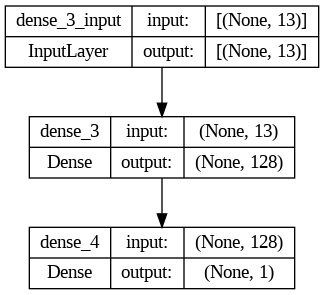

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

Оценка точности работы сети

In [ ]:
mse, mae = model.evaluate(x_train, y_train, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка (тысяч долларов):", mae)

Средняя абсолютная ошибка (тысяч долларов): 1.4011688232421875


In [ ]:
pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


 Использование НС для предсказания цен недвижимости Бостона

In [ ]:
print("Предсказанная стоимость:", pred[50][0], ", правильная стоимость:", y_test[50])

Предсказанная стоимость: 35.196335 , правильная стоимость: 35.4


In [ ]:
print("Предсказанная стоимость:", pred[100][0], ", правильная стоимость:", y_test[100])

Предсказанная стоимость: 29.493105 , правильная стоимость: 26.7


Самостоятельно

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Предположим, что у вас есть данные X_train, y_train для обучения и X_test, y_test для проверки

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1)  # Выходной слой без активации для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=300, batch_size=1, verbose=1)

# Получение прогнозов
y_pred = model.predict(x_test)

# Вывод средней абсолютной ошибки
mae = mean_absolute_error(y_test, y_pred)
print("Средняя абсолютная ошибка:", mae)

Epoch 1/300
1000/1000 [==============================] - 3s 2ms/step - loss: 0.0881
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0837
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0813
Epoch 4/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0816
Epoch 5/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0810
Epoch 6/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0798
Epoch 7/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0805
Epoch 8/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0800
Epoch 9/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0793
Epoch 10/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0780
Epoch 11/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0786
Epoch 12/300
1000/1000 [==============================] - 2s 2ms/step - lo

ValueError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# создаем модель нейронной сети
model = keras.Sequential([
    layers.Dense(13, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# компилируем модель
model.compile(optimizer='adam', loss='mae')

# генерируем случайные данные для обучения модели (для примера)
x_train = np.random.random((100, 10))
y_train = np.random.random((100, 1))

# обучаем модель на данных
history = model.fit(x_train, y_train, epochs=80, batch_size=1, verbose=1)

# делаем прогнозы
predictions = model.predict(x_train)

# выводим среднюю абсолютную ошибку
mae = np.mean(np.abs(predictions - y_train))
print("Средняя абсолютная ошибка:", mae)

Epoch 1/80
100/100 [==============================] - 1s 2ms/step - loss: 0.2747
Epoch 2/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 3/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 4/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2341
Epoch 5/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 6/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 7/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2282
Epoch 8/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2275
Epoch 9/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 10/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2173
Epoch 11/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 12/80
100/100 [==============================] - 0s 2ms/step - loss: 0.2054
Epoch 13/80
100/100 [====

Проведем нормализацию данных (2 эксперимент)
Подключаем недостающие зависимости в проект

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
normalizer1 = tf.keras.layers.Normalization(axis=-1)
normalizer2 = tf.keras.layers.Normalization(axis=-1)

In [ ]:
import numpy as np
normalizer1.adapt(np.array(x_train))
normalizer2.adapt(np.array(x_test))

In [ ]:
normalizer1.mean.numpy()
normalizer2.mean.numpy()

array([[-0.0707286 , -0.02435883,  0.02358875,  0.15007088, -0.11267862,
         0.1228299 , -0.07746072,  0.13399985,  0.0621344 ,  0.06981758,
        -0.0461766 ,  0.09979472, -0.06008184]], dtype=float32)

In [ ]:
x_train_new = normalizer1(x_train).numpy()
x_test_new = normalizer2(x_test).numpy()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Создаем данные для обучения
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# Создаем модель нейронной сети
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Обучаем модель на 100 эпохах
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Выводим среднюю абсолютную ошибку
y_pred = model.predict(X_train)
mae = np.mean(np.abs(y_train - y_pred))
print("Средняя абсолютная ошибка:", mae)

# Проводим прогнозирование результатов моделирования
predictions = model.predict(X_train)
print("Прогнозы:", predictions)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.2263 - mae: 0.4595
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2258 - mae: 0.4590
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2254 - mae: 0.4587
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2251 - mae: 0.4585
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2244 - mae: 0.4579
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2240 - mae: 0.4576
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2235 - mae: 0.4571
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2234 - mae: 0.4571
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2228 - mae: 0.4565
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2223 - mae: 0.4561
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2217 

Выводы: Параметр verbose в методе fit() отвечает за то, каким образом будет выводиться информация во время обучения модели. Если параметр verbose равен 0, то вывод информации будет отключен. Если параметр равен 1, то будет выводиться прогресс обучения на каждой эпохе. Если параметр равен 2, то будет выводиться информация о каждой эпохе.